In [15]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [16]:
(x_train, y_train), (x_test, y_test) =tf.keras.datasets.mnist.load_data()

In [17]:
num_pixels = x_train.shape[1] * x_train.shape[2]
df_train = pd.DataFrame(x_train.reshape(-1, num_pixels))
df_train['label'] = y_train
print(df_train.head())

   0  1  2  3  4  5  6  7  8  9  ...  775  776  777  778  779  780  781  782  \
0  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
1  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
2  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
3  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
4  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   

   783  label  
0    0      5  
1    0      0  
2    0      4  
3    0      1  
4    0      9  

[5 rows x 785 columns]


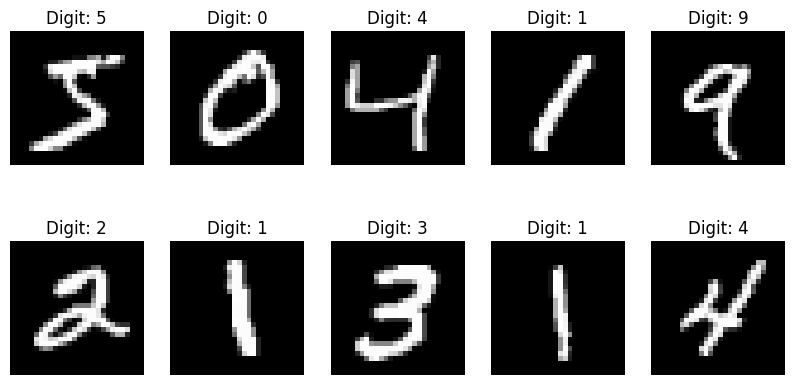

In [18]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(f"Digit: {y_train[i]}")
    ax.axis('off')
plt.show()

In [19]:
print("Label distribution:")
print(df_train['label'].value_counts().sort_index())
print("\nBasic statistics:")
print(df_train.describe())

Label distribution:
label
0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
Name: count, dtype: int64

Basic statistics:
             0        1        2        3        4        5        6        7  \
count  60000.0  60000.0  60000.0  60000.0  60000.0  60000.0  60000.0  60000.0   
mean       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
std        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
25%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
50%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
75%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
max        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

             8        9  ...           775           776           777  \
count  60000.0  60000.0  

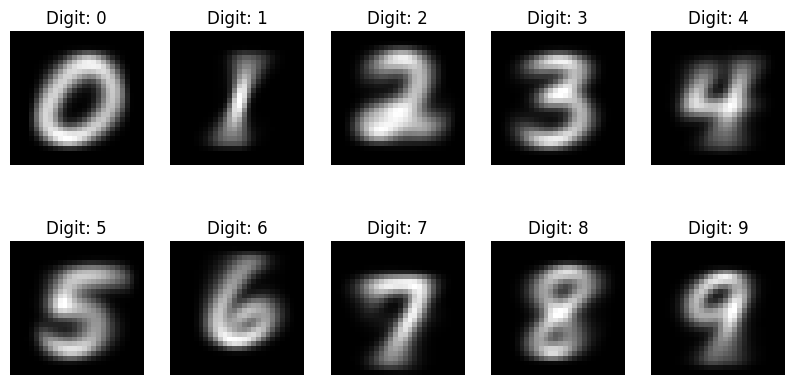

In [20]:
pixel_columns = [col for col in df_train.columns if col != 'label']
average_digits = df_train.groupby('label')[pixel_columns].mean().values
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(average_digits[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Digit: {i}")
    ax.axis('off')
plt.show()

In [21]:
x_train_flat = x_train.reshape(-1, 28*28) / 255.0  # Normalize for KNN
x_test_flat = x_test.reshape(-1, 28*28) / 255.0

In [22]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_flat, y_train)
y_pred = knn.predict(x_test_flat)

KNN Accuracy (n_neighbors=3): 0.9705

Confusion Matrix:
[[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [  10    9  996    2    0    0    0   13    2    0]
 [   0    2    4  976    1   13    1    7    3    3]
 [   1    6    0    0  950    0    4    2    0   19]
 [   6    1    0   11    2  859    5    1    3    4]
 [   5    3    0    0    3    3  944    0    0    0]
 [   0   21    5    0    1    0    0  991    0   10]
 [   8    2    4   16    8   11    3    4  914    4]
 [   4    5    2    8    9    2    1    8    2  968]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.96       892
          

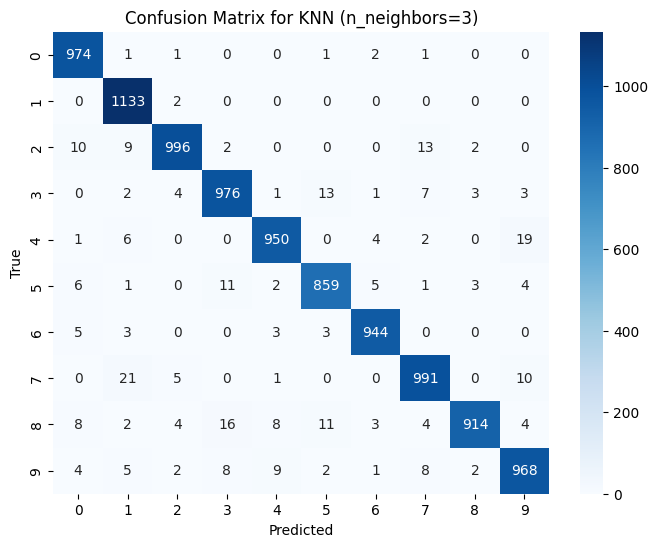

In [23]:
accuracy = accuracy_score(y_test, y_pred)
print("KNN Accuracy (n_neighbors=3):", accuracy)
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for KNN (n_neighbors=3)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [24]:
for n in [1, 3, 5]:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train_flat, y_train)
    y_pred = knn.predict(x_test_flat)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"KNN Accuracy (n_neighbors={n}): {accuracy}")

KNN Accuracy (n_neighbors=1): 0.9691
KNN Accuracy (n_neighbors=3): 0.9705
KNN Accuracy (n_neighbors=5): 0.9688


In [25]:
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

In [26]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_norm, y_train_cat, epochs=5, validation_split=0.1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8774 - loss: 0.4441 - val_accuracy: 0.9658 - val_loss: 0.1296
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9627 - loss: 0.1307 - val_accuracy: 0.9693 - val_loss: 0.1005
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9745 - loss: 0.0851 - val_accuracy: 0.9743 - val_loss: 0.0846
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9823 - loss: 0.0599 - val_accuracy: 0.9785 - val_loss: 0.0754
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9860 - loss: 0.0458 - val_accuracy: 0.9798 - val_loss: 0.0747


In [27]:
test_loss, test_acc = model.evaluate(x_test_norm, y_test_cat)
print('Neural Network Test Accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9742 - loss: 0.0882
Neural Network Test Accuracy: 0.977400004863739


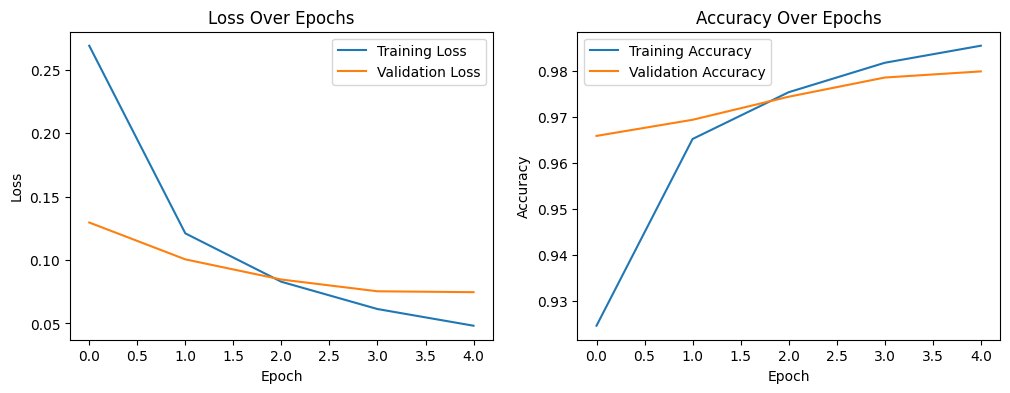

In [28]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [29]:
model_exp = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])
model_exp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_exp = model_exp.fit(x_train_norm, y_train_cat, epochs=10, validation_split=0.1)
test_loss_exp, test_acc_exp = model_exp.evaluate(x_test_norm, y_test_cat)
print('Neural Network Test Accuracy (256 neurons, 10 epochs):', test_acc_exp)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8846 - loss: 0.4009 - val_accuracy: 0.9687 - val_loss: 0.1065
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9697 - loss: 0.1019 - val_accuracy: 0.9760 - val_loss: 0.0823
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9802 - loss: 0.0635 - val_accuracy: 0.9747 - val_loss: 0.0816
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9864 - loss: 0.0454 - val_accuracy: 0.9798 - val_loss: 0.0692
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9912 - loss: 0.0313 - val_accuracy: 0.9767 - val_loss: 0.0832
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9932 - loss: 0.0229 - val_accuracy: 0.9773 - val_loss: 0.0852
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9932 - loss: 0.0199 - val_accuracy: 0.9802 - val_loss: 0.0751
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9957 - loss: 0.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Neural Network Confusion Matrix:
[[ 968    0    1    3    1    3    0    2    1    1]
 [   0 1120    4    1    0    2    2    0    6    0]
 [   1    0 1016    3    3    1    1    5    1    1]
 [   0    0    4  993    0    3    0    4    4    2]
 [   1    0    5    0  973    0    0    2    0    1]
 [   1    0    0   11    2  873    3    1    1    0]
 [   2    1    4    3    3   17  927    0    1    0]
 [   1    5    8    3    2    0    0 1003    2    4]
 [   1    0    2   13    5    7    1    2  940    3]
 [   2    4    0    9   19    6    0    7    1  961]]

Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.96      0.98      0.97      1010
           4       0.97      0.99      0.98       982
           5       0.96      0

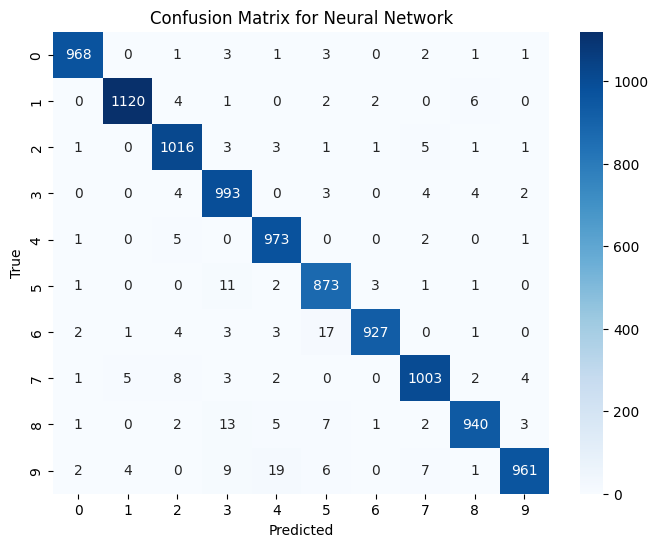

In [30]:
y_pred_nn = model.predict(x_test_norm)
y_pred_nn_classes = np.argmax(y_pred_nn, axis=1)
cm_nn = confusion_matrix(y_test, y_pred_nn_classes)
print("\nNeural Network Confusion Matrix:")
print(cm_nn)
print("\nNeural Network Classification Report:")
print(classification_report(y_test, y_pred_nn_classes))
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Neural Network')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Number of misclassified examples: 226


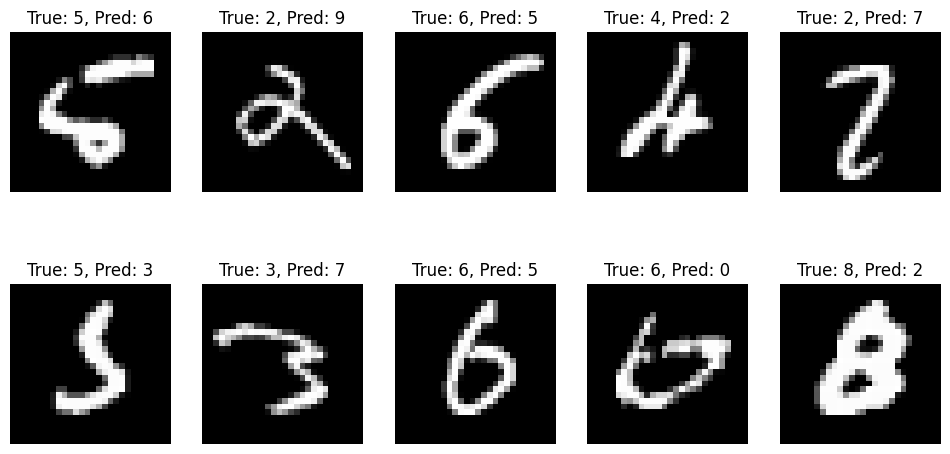

In [31]:
misclassified_idx = np.where(y_pred_nn_classes != y_test)[0]
print(f"Number of misclassified examples: {len(misclassified_idx)}")
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    if i < len(misclassified_idx):
        idx = misclassified_idx[i]
        ax.imshow(x_test[idx], cmap='gray')
        ax.set_title(f"True: {y_test[idx]}, Pred: {y_pred_nn_classes[idx]}")
        ax.axis('off')
plt.show()